# Subset correlation on pseudobulked data (import pseudobulk after normalisation in python)

### Only on primary tumours:

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk_figures')

### Load data:

In [3]:
#load data
sampleinfo_DC1 <- read.csv("pseudobulk_metadata_DC1.csv", row.names =1, check.names = FALSE)
sampleinfo_DC2 <- read.csv("pseudobulk_metadata_DC2.csv", row.names =1, check.names = FALSE)
sampleinfo_mregDC <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1, check.names = FALSE)
head(sampleinfo_DC1)
head(sampleinfo_DC2)
head(sampleinfo_mregDC)
dim(sampleinfo_DC1)
dim(sampleinfo_DC2)
dim(sampleinfo_mregDC)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


[1] 333   1

[1] 363   1

[1] 333   1

In [4]:
row.names(sampleinfo_DC1) <- paste(row.names(sampleinfo_DC1), "cDC1", sep = "_")
row.names(sampleinfo_DC2) <- paste(row.names(sampleinfo_DC2), "cDC2", sep = "_")
row.names(sampleinfo_mregDC) <- paste(row.names(sampleinfo_mregDC), "mregDC", sep = "_")
sampleinfo_DC1$Subset <- "cDC1"
sampleinfo_DC2$Subset <- "cDC2"
sampleinfo_mregDC$Subset <- "mregDC"
head(sampleinfo_DC1)
head(sampleinfo_DC2)
head(sampleinfo_mregDC)


,cancer_broadest,Subset
,<chr>,<chr>
GGSE223063_GLIO_1_cDC1,GBM,cDC1
GGSE223063_GLIO_3_cDC1,GBM,cDC1
GSE112271_HCC_Pt13_cDC1,HCC,cDC1
GSE112271_HCC_Pt14_cDC1,HCC,cDC1
GSE131907_LUAD_T0006_cDC1,NSCLC,cDC1
GSE131907_LUAD_T0008_cDC1,NSCLC,cDC1


,cancer_broadest,Subset
,<chr>,<chr>
GGSE223063_GLIO_1_cDC2,GBM,cDC2
GGSE223063_GLIO_3_cDC2,GBM,cDC2
GSE112271_HCC_Pt13_cDC2,HCC,cDC2
GSE112271_HCC_Pt14_cDC2,HCC,cDC2
GSE131907_LUAD_T0006_cDC2,NSCLC,cDC2
GSE131907_LUAD_T0008_cDC2,NSCLC,cDC2


,cancer_broadest,Subset
,<chr>,<chr>
GGSE223063_GLIO_1_mregDC,GBM,mregDC
GSE112271_HCC_Pt13_mregDC,HCC,mregDC
GSE112271_HCC_Pt14_mregDC,HCC,mregDC
GSE131907_LUAD_T0006_mregDC,NSCLC,mregDC
GSE131907_LUAD_T0008_mregDC,NSCLC,mregDC
GSE131907_LUAD_T0009_mregDC,NSCLC,mregDC


In [5]:
unique(sampleinfo_DC1$cancer_broadest)

[1] "GBM"   "HCC"   "NSCLC" "HNSCC" "PDAC"  "BC"    "NPC"   "GAC"   "HGSOC"
[10] "iCCA"  "MEL"   "CRC"

In [6]:
cts_DC1 <- read.csv("pseudobulk_DC1_norm.csv", row.names = 1)
cts_DC2 <- read.csv("pseudobulk_DC2_norm.csv", row.names = 1)
cts_mregDC <- read.csv("pseudobulk_mregDC_norm.csv", row.names = 1)
head(cts_DC1)
head(cts_DC2)
head(cts_mregDC)
dim(cts_DC1)
dim(cts_DC2)
dim(cts_mregDC)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
LINC00115,0,0,0,15.48635,0.00000,0,4.961253,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,13.65766,9.66744,9.749534,0.000000,0.00000,0.00000
FAM41C,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
SAMD11,0,0,0,0.00000,9.25369,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,8.623515,0.00000,0.00000
NOC2L,0,0,0,30.97270,9.25369,0,34.728768,14.60494,12.81994,17.58304,⋯,0,45.838337,0,51.72414,13.65766,19.33488,29.248603,17.247029,37.36991,66.89411
KLHL17,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,9.167667,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.000000,4.105343,0.000000,0.000000,0.00000,0.000000,3.001628,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0.00000,0.00000
LINC00115,0.00000,0,0.00000,7.510609,6.158015,0.000000,4.332878,0.00000,4.263029,1.500814,⋯,0,1.369507,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,0.00000
FAM41C,6.62278,0,0.00000,7.510609,4.105343,0.000000,2.166439,0.00000,0.000000,1.500814,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,14.07103
SAMD11,0.00000,0,0.00000,0.000000,0.000000,4.642332,0.000000,0.00000,0.000000,0.000000,⋯,0,0.000000,0.000000,6.255787,0.00000,0.00000,2.618247,0,0.00000,0.00000
NOC2L,26.49112,0,93.52787,45.063652,34.895416,27.853989,15.165072,24.23126,14.210096,25.513841,⋯,0,30.129144,40.609755,43.790506,30.24194,37.14434,18.327726,0,26.31579,42.21309
KLHL17,6.62278,0,0.00000,0.000000,2.052672,0.000000,2.166439,0.00000,1.421010,0.000000,⋯,0,0.000000,5.076219,0.000000,0.00000,0.00000,0.000000,0,13.15789,0.00000


,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
LINC00115,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.444711,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,6.714654,0,0,0
FAM41C,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
SAMD11,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
NOC2L,51.24132,0,42.17037,30.58197,39.69231,0,41.50842,17.59733,20.34436,25.778843,⋯,26.806058,14.66211,19.00201,28.50952,39.83191,0,6.714654,0,0,0
KLHL17,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,6.701515,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0


[1] 15074   333

[1] 15074   363

[1] 15074   333

### Add cell subset to column name

In [7]:
colnames(cts_DC1) <- paste0(colnames(cts_DC1), "_cDC1")
colnames(cts_DC2) <- paste0(colnames(cts_DC2), "_cDC2")
colnames(cts_mregDC) <- paste0(colnames(cts_mregDC), "_mregDC")

# change periods to hyphens
colnames(cts_DC1) <- gsub("[.]", "-", colnames(cts_DC1))
colnames(cts_DC2) <- gsub("[.]", "-", colnames(cts_DC2))
colnames(cts_mregDC) <- gsub("[.]", "-", colnames(cts_mregDC))

In [8]:
head(cts_DC1)
head(cts_DC2)
head(cts_mregDC)

,GGSE223063_GLIO_1_cDC1,GGSE223063_GLIO_3_cDC1,GSE112271_HCC_Pt13_cDC1,GSE112271_HCC_Pt14_cDC1,GSE131907_LUAD_T0006_cDC1,GSE131907_LUAD_T0008_cDC1,GSE131907_LUAD_T0009_cDC1,GSE131907_LUAD_T0018_cDC1,GSE131907_LUAD_T0019_cDC1,GSE131907_LUAD_T0020_cDC1,⋯,PMID32561858_breast_50_cDC1,PMID32561858_breast_51_cDC1,PMID32561858_breast_52_cDC1,PRJCA005422_HGSOC1_PT_cDC1,PRJCA005422_HGSOC2_PT_cDC1,PRJCA005422_HGSOC3_PT_cDC1,PRJCA005422_HGSOC4_PT_cDC1,PRJCA005422_HGSOC7_PT_cDC1,PRJCA005422_HGSOC8_PT_cDC1,PRJCA005422_HGSOC9_PT_cDC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
LINC00115,0,0,0,15.48635,0.00000,0,4.961253,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,13.65766,9.66744,9.749534,0.000000,0.00000,0.00000
FAM41C,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000
SAMD11,0,0,0,0.00000,9.25369,0,0.000000,0.00000,0.00000,0.00000,⋯,0,0.000000,0,0.00000,0.00000,0.00000,0.000000,8.623515,0.00000,0.00000
NOC2L,0,0,0,30.97270,9.25369,0,34.728768,14.60494,12.81994,17.58304,⋯,0,45.838337,0,51.72414,13.65766,19.33488,29.248603,17.247029,37.36991,66.89411
KLHL17,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0,9.167667,0,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000


,GGSE223063_GLIO_1_cDC2,GGSE223063_GLIO_3_cDC2,GSE112271_HCC_Pt13_cDC2,GSE112271_HCC_Pt14_cDC2,GSE131907_LUAD_T0006_cDC2,GSE131907_LUAD_T0008_cDC2,GSE131907_LUAD_T0009_cDC2,GSE131907_LUAD_T0018_cDC2,GSE131907_LUAD_T0019_cDC2,GSE131907_LUAD_T0020_cDC2,⋯,PMID32561858_breast_54_cDC2,PRJCA005422_HGSOC1_PT_cDC2,PRJCA005422_HGSOC2_PT_cDC2,PRJCA005422_HGSOC3_PT_cDC2,PRJCA005422_HGSOC4_PT_cDC2,PRJCA005422_HGSOC6_PT_cDC2,PRJCA005422_HGSOC7_PT_cDC2,PRJCA005422_HGSOC8_PT_cDC2,PRJCA005422_HGSOC9_PT_cDC2,PRJCA005422_HGSOC10_PT_cDC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.000000,4.105343,0.000000,0.000000,0.00000,0.000000,3.001628,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0,0.00000,0.00000
LINC00115,0.00000,0,0.00000,7.510609,6.158015,0.000000,4.332878,0.00000,4.263029,1.500814,⋯,0,1.369507,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,0.00000
FAM41C,6.62278,0,0.00000,7.510609,4.105343,0.000000,2.166439,0.00000,0.000000,1.500814,⋯,0,0.000000,0.000000,0.000000,0.00000,0.00000,2.618247,0,0.00000,14.07103
SAMD11,0.00000,0,0.00000,0.000000,0.000000,4.642332,0.000000,0.00000,0.000000,0.000000,⋯,0,0.000000,0.000000,6.255787,0.00000,0.00000,2.618247,0,0.00000,0.00000
NOC2L,26.49112,0,93.52787,45.063652,34.895416,27.853989,15.165072,24.23126,14.210096,25.513841,⋯,0,30.129144,40.609755,43.790506,30.24194,37.14434,18.327726,0,26.31579,42.21309
KLHL17,6.62278,0,0.00000,0.000000,2.052672,0.000000,2.166439,0.00000,1.421010,0.000000,⋯,0,0.000000,5.076219,0.000000,0.00000,0.00000,0.000000,0,13.15789,0.00000


,GGSE223063_GLIO_1_mregDC,GSE112271_HCC_Pt13_mregDC,GSE112271_HCC_Pt14_mregDC,GSE131907_LUAD_T0006_mregDC,GSE131907_LUAD_T0008_mregDC,GSE131907_LUAD_T0009_mregDC,GSE131907_LUAD_T0018_mregDC,GSE131907_LUAD_T0019_mregDC,GSE131907_LUAD_T0020_mregDC,GSE131907_LUAD_T0025_mregDC,⋯,PMID32561858_breast_51_mregDC,PRJCA005422_HGSOC1_PT_mregDC,PRJCA005422_HGSOC2_PT_mregDC,PRJCA005422_HGSOC3_PT_mregDC,PRJCA005422_HGSOC4_PT_mregDC,PRJCA005422_HGSOC6_PT_mregDC,PRJCA005422_HGSOC7_PT_mregDC,PRJCA005422_HGSOC8_PT_mregDC,PRJCA005422_HGSOC9_PT_mregDC,PRJCA005422_HGSOC10_PT_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
LINC00115,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.444711,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,6.714654,0,0,0
FAM41C,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
SAMD11,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
NOC2L,51.24132,0,42.17037,30.58197,39.69231,0,41.50842,17.59733,20.34436,25.778843,⋯,26.806058,14.66211,19.00201,28.50952,39.83191,0,6.714654,0,0,0
KLHL17,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.000000,⋯,6.701515,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0


### combine dataframes all together

In [9]:
dim(cts_DC1)
dim(cts_DC2)
dim(cts_mregDC)

[1] 15074   333

[1] 15074   363

[1] 15074   333

In [10]:
all(rownames(cts_DC1) == rownames(cts_DC2))  
all(rownames(cts_DC1) == rownames(cts_mregDC))  

[1] TRUE

[1] TRUE

In [11]:
combined_expr <- cbind(cts_DC1, cts_DC2, cts_mregDC)
dim(combined_expr)

[1] 15074  1029

In [12]:
333+333+363

[1] 1029

In [13]:
row.names(sampleinfo_DC1)[!row.names(sampleinfo_DC1) %in% colnames(cts_DC1)]

character(0)

In [14]:
colnames(cts_DC1)[!colnames(cts_DC1) %in% row.names(sampleinfo_DC1)]

character(0)

In [15]:
head(combined_expr)

,GGSE223063_GLIO_1_cDC1,GGSE223063_GLIO_3_cDC1,GSE112271_HCC_Pt13_cDC1,GSE112271_HCC_Pt14_cDC1,GSE131907_LUAD_T0006_cDC1,GSE131907_LUAD_T0008_cDC1,GSE131907_LUAD_T0009_cDC1,GSE131907_LUAD_T0018_cDC1,GSE131907_LUAD_T0019_cDC1,GSE131907_LUAD_T0020_cDC1,⋯,PMID32561858_breast_51_mregDC,PRJCA005422_HGSOC1_PT_mregDC,PRJCA005422_HGSOC2_PT_mregDC,PRJCA005422_HGSOC3_PT_mregDC,PRJCA005422_HGSOC4_PT_mregDC,PRJCA005422_HGSOC6_PT_mregDC,PRJCA005422_HGSOC7_PT_mregDC,PRJCA005422_HGSOC8_PT_mregDC,PRJCA005422_HGSOC9_PT_mregDC,PRJCA005422_HGSOC10_PT_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
LINC00115,0,0,0,15.48635,0.00000,0,4.961253,0.00000,0.00000,0.00000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,6.714654,0,0,0
FAM41C,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
SAMD11,0,0,0,0.00000,9.25369,0,0.000000,0.00000,0.00000,0.00000,⋯,0.000000,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0
NOC2L,0,0,0,30.97270,9.25369,0,34.728768,14.60494,12.81994,17.58304,⋯,26.806058,14.66211,19.00201,28.50952,39.83191,0,6.714654,0,0,0
KLHL17,0,0,0,0.00000,0.00000,0,0.000000,0.00000,0.00000,0.00000,⋯,6.701515,0.00000,0.00000,0.00000,0.00000,0,0.000000,0,0,0


In [16]:
# combine sample info as well
combined_info <- rbind(sampleinfo_DC1, sampleinfo_DC2, sampleinfo_mregDC)
head(combined_info)

,cancer_broadest,Subset
,<chr>,<chr>
GGSE223063_GLIO_1_cDC1,GBM,cDC1
GGSE223063_GLIO_3_cDC1,GBM,cDC1
GSE112271_HCC_Pt13_cDC1,HCC,cDC1
GSE112271_HCC_Pt14_cDC1,HCC,cDC1
GSE131907_LUAD_T0006_cDC1,NSCLC,cDC1
GSE131907_LUAD_T0008_cDC1,NSCLC,cDC1


# calculate correlation:

In [17]:
dim(combined_expr)

[1] 15074  1029

In [18]:
cor_mat <- cor(combined_expr, method = "pearson") 

In [19]:
head(cor_mat)

,GGSE223063_GLIO_1_cDC1,GGSE223063_GLIO_3_cDC1,GSE112271_HCC_Pt13_cDC1,GSE112271_HCC_Pt14_cDC1,GSE131907_LUAD_T0006_cDC1,GSE131907_LUAD_T0008_cDC1,GSE131907_LUAD_T0009_cDC1,GSE131907_LUAD_T0018_cDC1,GSE131907_LUAD_T0019_cDC1,GSE131907_LUAD_T0020_cDC1,⋯,PMID32561858_breast_51_mregDC,PRJCA005422_HGSOC1_PT_mregDC,PRJCA005422_HGSOC2_PT_mregDC,PRJCA005422_HGSOC3_PT_mregDC,PRJCA005422_HGSOC4_PT_mregDC,PRJCA005422_HGSOC6_PT_mregDC,PRJCA005422_HGSOC7_PT_mregDC,PRJCA005422_HGSOC8_PT_mregDC,PRJCA005422_HGSOC9_PT_mregDC,PRJCA005422_HGSOC10_PT_mregDC
GGSE223063_GLIO_1_cDC1,1.0000000,0.8552595,0.7572490,0.8558573,0.5585588,0.5472196,0.5951921,0.4795650,0.5401093,0.5216127,⋯,0.5364807,0.5374934,0.6479206,0.5492628,0.4847525,0.4077901,0.4174861,0.3801358,0.6471139,0.4968456
GGSE223063_GLIO_3_cDC1,0.8552595,1.0000000,0.8037904,0.9037070,0.8420980,0.8411048,0.8463343,0.7635082,0.8378816,0.8109147,⋯,0.7243506,0.7109605,0.7898037,0.7144899,0.7246550,0.5939573,0.6311083,0.5947663,0.7377301,0.6897761
GSE112271_HCC_Pt13_cDC1,0.7572490,0.8037904,1.0000000,0.8896285,0.7201111,0.7239149,0.7211968,0.6971115,0.7067827,0.7156656,⋯,0.6533249,0.6537580,0.6861070,0.6479481,0.6343187,0.5982839,0.6302790,0.5650116,0.7288591,0.6703823
GSE112271_HCC_Pt14_cDC1,0.8558573,0.9037070,0.8896285,1.0000000,0.8143869,0.7958960,0.8247963,0.7266277,0.7822614,0.7717589,⋯,0.6570525,0.6683560,0.7618135,0.6797494,0.6467013,0.5156603,0.5819907,0.5681839,0.7398281,0.6056149
GSE131907_LUAD_T0006_cDC1,0.5585588,0.8420980,0.7201111,0.8143869,1.0000000,0.9809519,0.9799613,0.9296816,0.9742967,0.9739769,⋯,0.7447619,0.7680269,0.8027011,0.7538438,0.7880962,0.6175664,0.6977385,0.7103484,0.7165096,0.6956838
GSE131907_LUAD_T0008_cDC1,0.5472196,0.8411048,0.7239149,0.7958960,0.9809519,1.0000000,0.9793422,0.9529958,0.9816639,0.9812832,⋯,0.7760586,0.7981648,0.8188266,0.7806797,0.8458096,0.6878402,0.7221579,0.7533928,0.7375274,0.7286369


In [20]:
colnames(cor_mat) %in% row.names(combined_info)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [21]:
unique(combined_info$cancer_broadest)

[1] "GBM"   "HCC"   "NSCLC" "HNSCC" "PDAC"  "BC"    "NPC"   "GAC"   "HGSOC"
[10] "iCCA"  "MEL"   "CRC"

In [23]:
library(pheatmap)

In [24]:
packageVersion("pheatmap")

[1] ‘1.0.12’

In [25]:
dim(cor_mat)

[1] 1029 1029

In [34]:
library(grid)

## re-plot with DC colours that match other figs

In [26]:
cor_colors <- list(
  Subset = c("cDC1" = "#e377c2", "cDC2" = "#aa40fc", "mregDC" = "#8c564b"),
  cancer_broadest	 = c('GBM'="#a6cee3",
  'HCC'="#1f78b4",
  'NSCLC'="#b2df8a",
  'HNSCC'="#33a02c",
  'PDAC'="#fb9a99",
  'BC'="#e31a1c",
  'NPC'="#fbdf6f",
  'GAC'="#ff7f00",
  'HGSOC'="#cab2d6",
  'iCCA'="#6a3d9a",
  'MEL'="#9D7E77",
  'CRC'="#653B31")
)

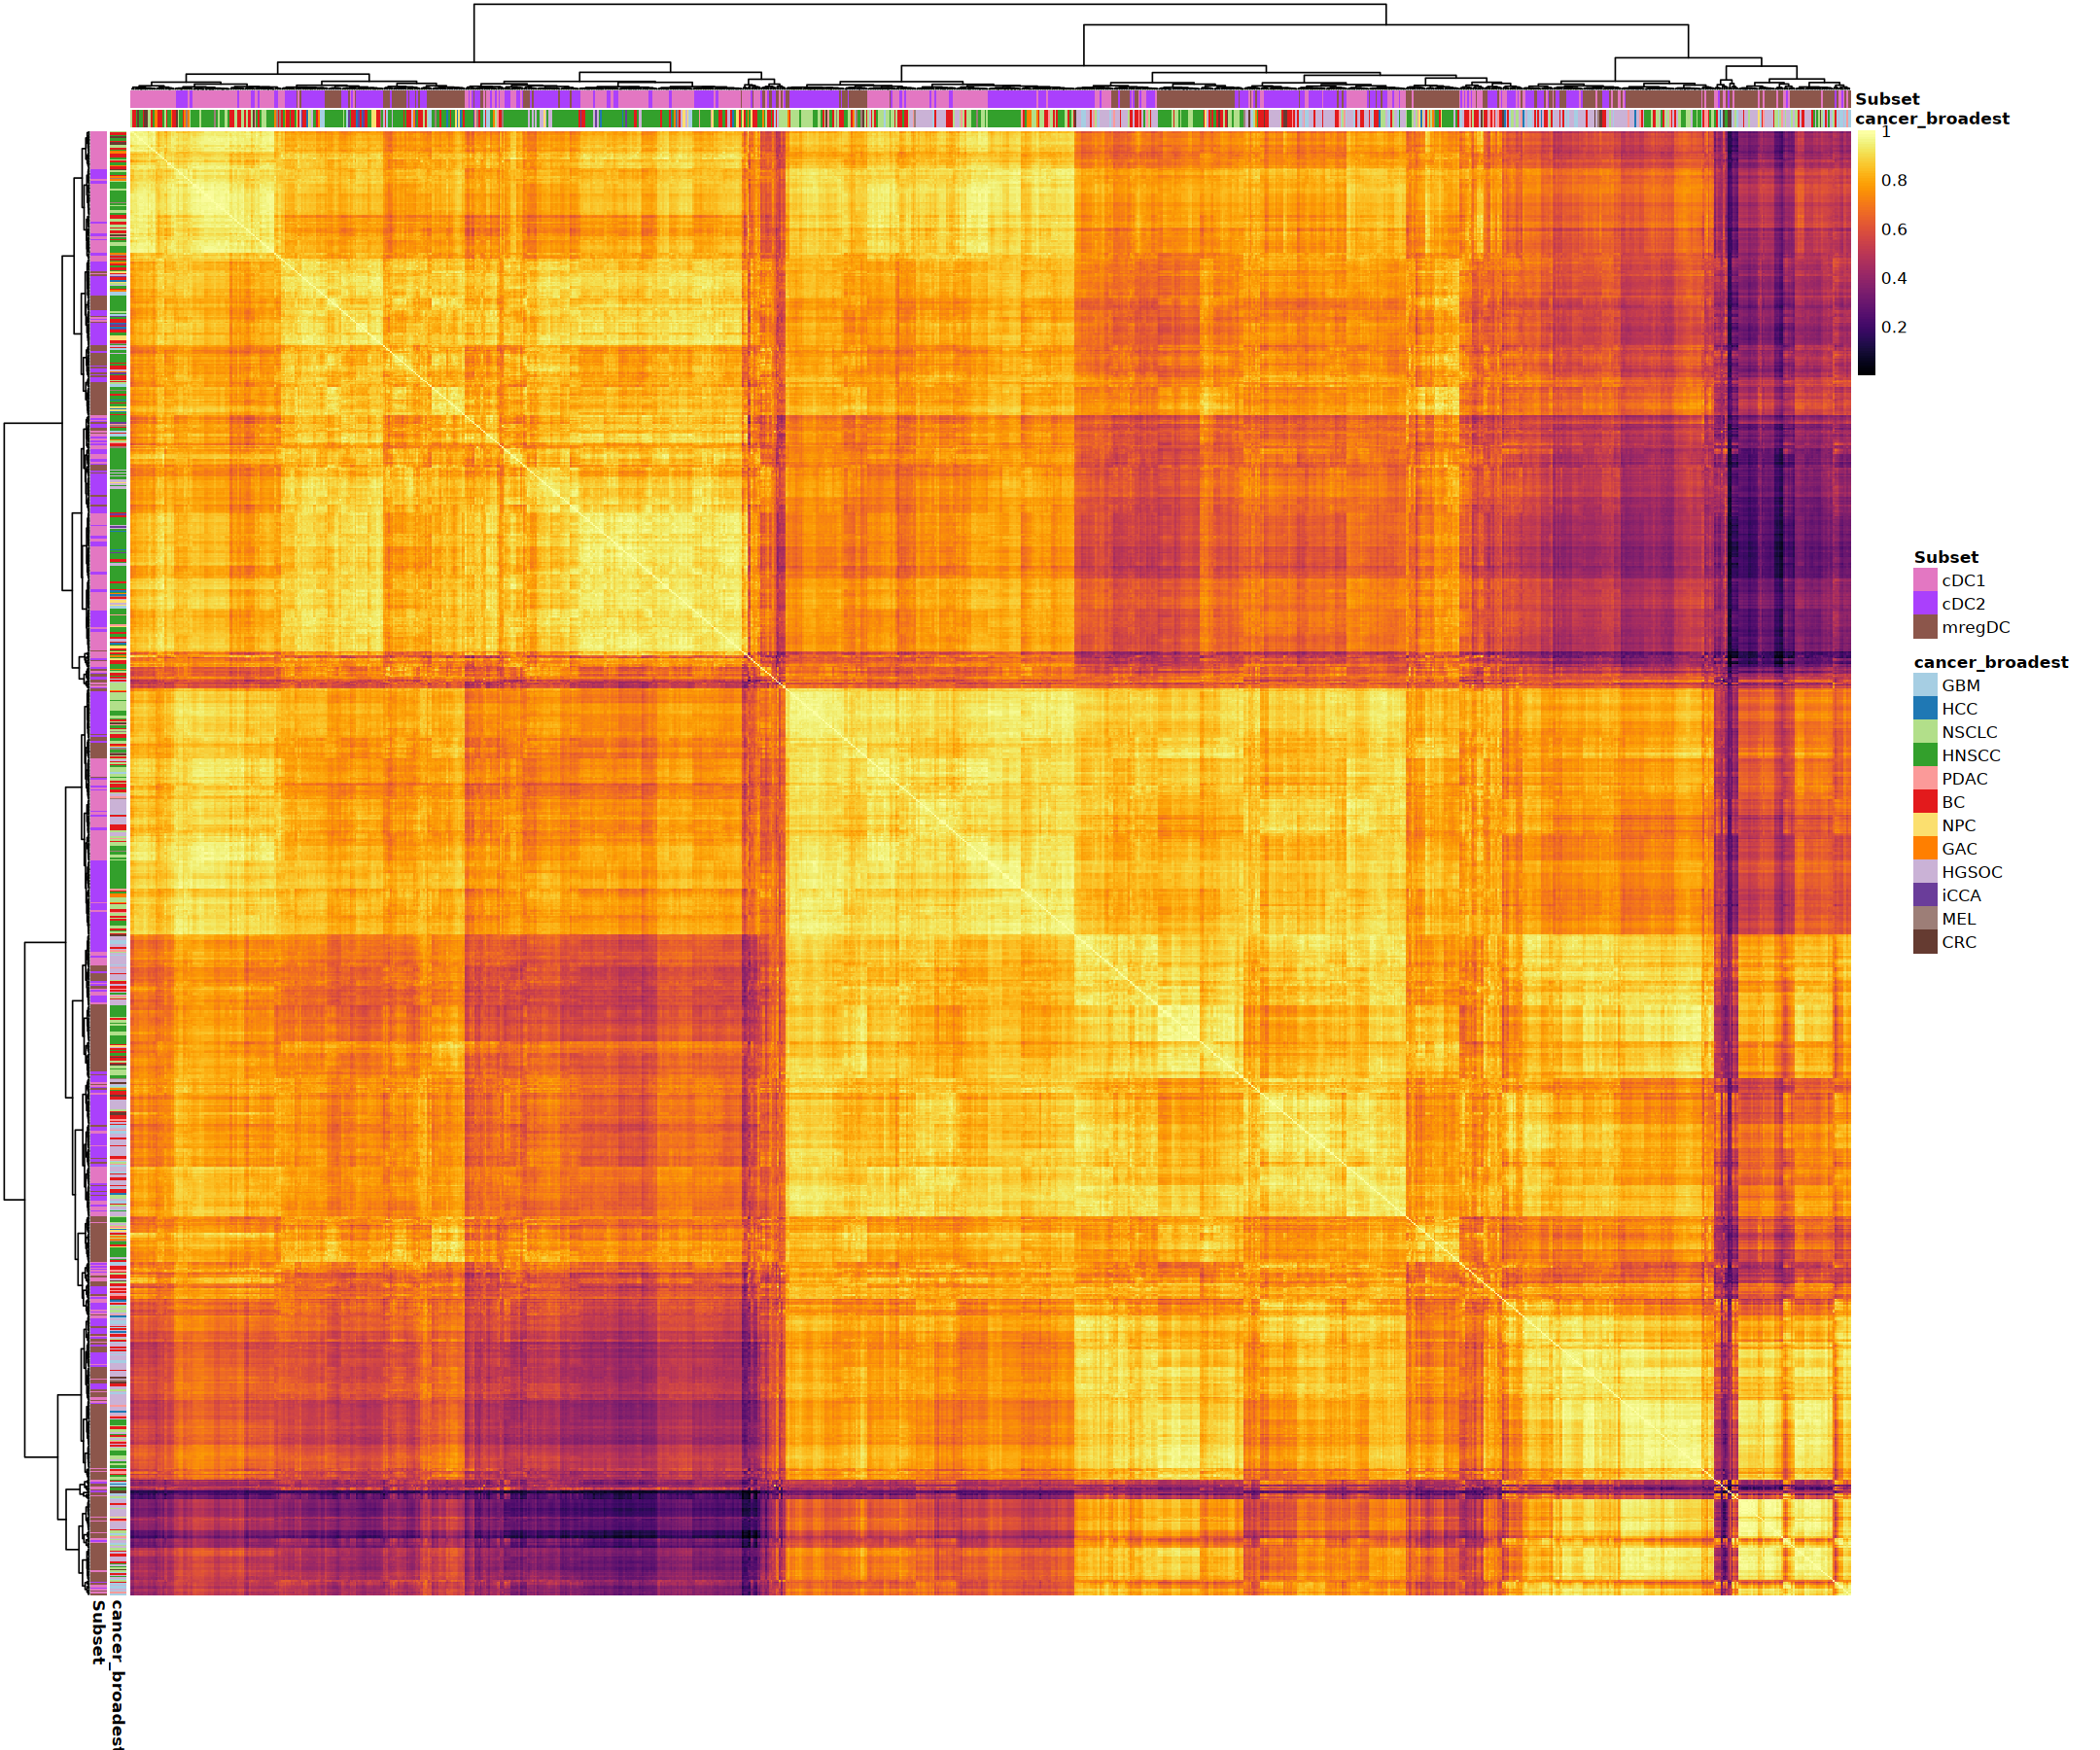

In [33]:
options(repr.plot.height=15, repr.plot.width=18)
pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = combined_info,
         annotation_row = combined_info,
         show_rownames = F,
         show_colnames = F,
         color = viridis::inferno(100),
         annotation_colors = cor_colors)

In [35]:
#save a pdf 

p <- pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = combined_info,
         annotation_row = combined_info,
         show_rownames = F,
         show_colnames = F,
         color = viridis::inferno(100),
         annotation_colors = cor_colors,
         silent = TRUE #needed for export to work
         )

# save PDF export 
pdf("correlation_heatmap_v2.pdf", width = 18, height = 15)  
grid::grid.newpage()
grid::grid.draw(p$gtable)
dev.off()

pdf 
  2

In [37]:
#save a high res png 

p <- pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = combined_info,
         annotation_row = combined_info,
         show_rownames = F,
         show_colnames = F,
         color = viridis::inferno(100),
         annotation_colors = cor_colors,
         silent = TRUE #needed for export to work
         )

# save PNG export 
png("correlation_heatmap_1200_v2.png", width = 18, height = 15, units = "in", res = 1200) 
grid::grid.newpage()
grid::grid.draw(p$gtable)
dev.off()

pdf 
  2

### Now want to cut above dendogram in 3 so I can quantify how many of each subset in in each branch

In [ ]:
View(pheatmap) #seeing how dendrogram calculated

function (mat, color = colorRampPalette(rev(brewer.pal(n = 7, 
    name = "RdYlBu")))(100), kmeans_k = NA, breaks = NA, border_color = "grey60", 
    cellwidth = NA, cellheight = NA, scale = "none", cluster_rows = TRUE, 
    cluster_cols = TRUE, clustering_distance_rows = "euclidean", 
    clustering_distance_cols = "euclidean", clustering_method = "complete", 
    clustering_callback = identity2, cutree_rows = NA, cutree_cols = NA, 
    treeheight_row = ifelse((class(cluster_rows) == "hclust") || 
        cluster_rows, 50, 0), treeheight_col = ifelse((class(cluster_cols) == 
        "hclust") || cluster_cols, 50, 0), legend = TRUE, legend_breaks = NA, 
    legend_labels = NA, annotation_row = NA, annotation_col = NA, 
    annotation = NA, annotation_colors = NA, annotation_legend = TRUE, 
    annotation_names_row = TRUE, annotation_names_col = TRUE, 
    drop_levels = TRUE, show_rownames = T, show_colnames = T, 
    main = NA, fontsize = 10, fontsize_row = fontsize, fontsize_col = fontsize, 
    angle_col = c("270", "0", "45", "90", "315"), display_numbers = F, 
    number_format = "%.2f", number_color = "grey30", fontsize_number = 0.8 * 
        fontsize, gaps_row = NULL, gaps_col = NULL, labels_row = NULL, 
    labels_col = NULL, filename = NA, width = NA, height = NA, 
    silent = FALSE, na_col = "#DDDDDD", ...) 
{
    if (is.null(labels_row)) {
        labels_row = rownames(mat)
    }
    if (is.null(labels_col)) {
        labels_col = colnames(mat)
    }
    mat = as.matrix(mat)
    if (scale != "none") {
        mat = scale_mat(mat, scale)
        if (is.na2(breaks)) {
            breaks = generate_breaks(mat, length(color), center = T)
        }
    }
    if (!is.na(kmeans_k)) {
        km = kmeans(mat, kmeans_k, iter.max = 100)
        mat = km$centers
        t = table(km$cluster)
        labels_row = sprintf("Cluster: %s Size: %d", names(t), 
            t)
    }
    else {
        km = NA
    }
    if (is.matrix(display_numbers) | is.data.frame(display_numbers)) {
        if (nrow(display_numbers) != nrow(mat) | ncol(display_numbers) != 
            ncol(mat)) {
            stop("If display_numbers provided as matrix, its dimensions have to match with mat")
        }
        display_numbers = as.matrix(display_numbers)
        fmat = matrix(as.character(display_numbers), nrow = nrow(display_numbers), 
            ncol = ncol(display_numbers))
        fmat_draw = TRUE
    }
    else {
        if (display_numbers) {
            fmat = matrix(sprintf(number_format, mat), nrow = nrow(mat), 
                ncol = ncol(mat))
            fmat_draw = TRUE
        }
        else {
            fmat = matrix(NA, nrow = nrow(mat), ncol = ncol(mat))
            fmat_draw = FALSE
        }
    }
    if ((class(cluster_rows) == "hclust") || cluster_rows) {
        if (class(cluster_rows) == "hclust") {
            tree_row = cluster_rows
        }
        else {
            tree_row = cluster_mat(mat, distance = clustering_distance_rows, 
                method = clustering_method)
            tree_row = clustering_callback(tree_row, mat)
        }
        mat = mat[tree_row$order, , drop = FALSE]
        fmat = fmat[tree_row$order, , drop = FALSE]
        labels_row = labels_row[tree_row$order]
        if (!is.na(cutree_rows)) {
            gaps_row = find_gaps(tree_row, cutree_rows)
        }
        else {
            gaps_row = NULL
        }
    }
    else {
        tree_row = NA
        treeheight_row = 0
    }
    if ((class(cluster_cols) == "hclust") || cluster_cols) {
        if (class(cluster_cols) == "hclust") {
            tree_col = cluster_cols
        }
        else {
            tree_col = cluster_mat(t(mat), distance = clustering_distance_cols, 
                method = clustering_method)
            tree_col = clustering_callback(tree_col, t(mat))
        }
        mat = mat[, tree_col$order, drop = FALSE]
        fmat = fmat[, tree_col$order, drop = FALSE]
        labels_col = labels_col[tree_col$order]
     

In [36]:
# compute column dendrogram:
col_dist <- dist(t(cor_mat), method = "euclidean")
col_clust <- hclust(col_dist, method = "ward.D2")

In [37]:
# cut the dendrogram in to 3 groups:
col_groups <- cutree(col_clust, k = 3)

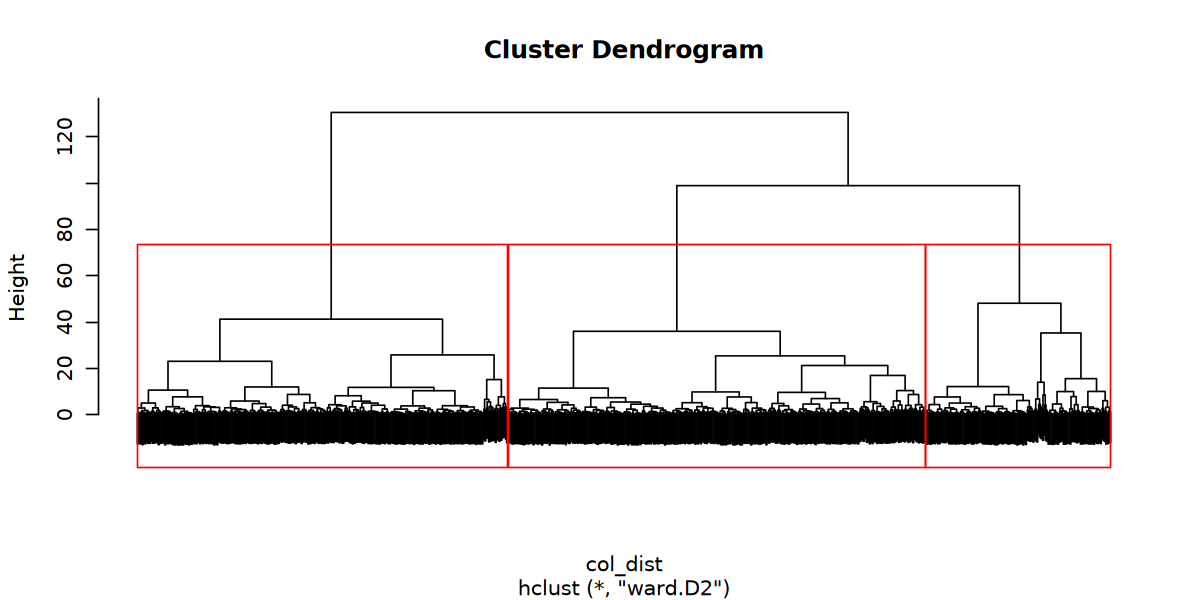

In [38]:
#confirm it cut where I want it to
options(repr.plot.height=5, repr.plot.width=10)
plot(col_clust, labels = FALSE)              # plot the dendrogram
rect.hclust(col_clust, k = 3, border = "red")  # draws boxes around the 3 groups

In [39]:
# create a dataframe with samples and their cluster:
cluster_df <- data.frame(
  sample = names(col_groups),
  cluster = as.factor(col_groups)
)

In [40]:
head(cluster_df)

,sample,cluster
,<chr>,<fct>
GGSE223063_GLIO_1_cDC1,GGSE223063_GLIO_1_cDC1,1
GGSE223063_GLIO_3_cDC1,GGSE223063_GLIO_3_cDC1,2
GSE112271_HCC_Pt13_cDC1,GSE112271_HCC_Pt13_cDC1,2
GSE112271_HCC_Pt14_cDC1,GSE112271_HCC_Pt14_cDC1,1
GSE131907_LUAD_T0006_cDC1,GSE131907_LUAD_T0006_cDC1,2
GSE131907_LUAD_T0008_cDC1,GSE131907_LUAD_T0008_cDC1,2


In [41]:
# merge with combined info:
merged_info <- merge(combined_info, cluster_df, by.x = "row.names", by.y = "sample")

In [42]:
head(merged_info)

,Row.names,cancer_broadest,Subset,cluster
,<I<chr>>,<chr>,<chr>,<fct>
1,GGSE223063_GLIO_1_cDC1,GBM,cDC1,1
2,GGSE223063_GLIO_1_cDC2,GBM,cDC2,1
3,GGSE223063_GLIO_1_mregDC,GBM,mregDC,1
4,GGSE223063_GLIO_3_cDC1,GBM,cDC1,2
5,GGSE223063_GLIO_3_cDC2,GBM,cDC2,2
6,GSE112271_HCC_Pt13_cDC1,HCC,cDC1,2


[1] TRUE

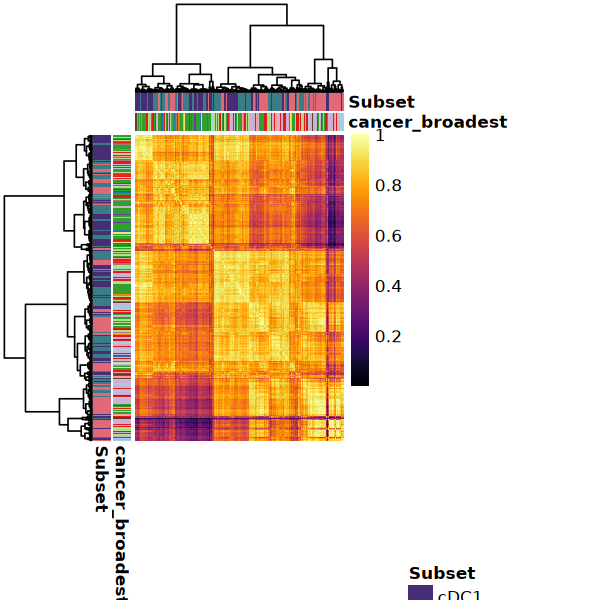

In [43]:
# check manual clustering same as pheatmap

options(repr.plot.height=5, repr.plot.width=5)
p <- pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = combined_info,
         annotation_row = combined_info,
         show_rownames = F,
         show_colnames = F,
         color = viridis::inferno(100),
         annotation_colors = cor_colors)

# Get order of columns (samples) from both dendrograms
manual_order <- col_clust$order
pheatmap_order <- p$tree_col$order

# Compare directly
all.equal(manual_order, pheatmap_order)

In [44]:
head(merged_info)

,Row.names,cancer_broadest,Subset,cluster
,<I<chr>>,<chr>,<chr>,<fct>
1,GGSE223063_GLIO_1_cDC1,GBM,cDC1,1
2,GGSE223063_GLIO_1_cDC2,GBM,cDC2,1
3,GGSE223063_GLIO_1_mregDC,GBM,mregDC,1
4,GGSE223063_GLIO_3_cDC1,GBM,cDC1,2
5,GGSE223063_GLIO_3_cDC2,GBM,cDC2,2
6,GSE112271_HCC_Pt13_cDC1,HCC,cDC1,2


In [52]:
dim(merged_info)

[1] 1029    4

### Plot proportions:

In [45]:
# make contingency table
table_summary <- table(merged_info$Subset, merged_info$cluster)
head(table_summary)

        
           1   2   3
  cDC1    28 124 181
  cDC2    31 194 138
  mregDC 137 123  73

In [46]:
# convert to proportions
prop_summary <- prop.table(table_summary, margin = 1)  
head(prop_summary)

        
                  1          2          3
  cDC1   0.08408408 0.37237237 0.54354354
  cDC2   0.08539945 0.53443526 0.38016529
  mregDC 0.41141141 0.36936937 0.21921922

In [47]:
library(ggplot2)

# Convert to long format
library(reshape2)
df_long <- melt(prop_summary)
colnames(df_long) <- c("Subset", "Cluster", "Proportion")

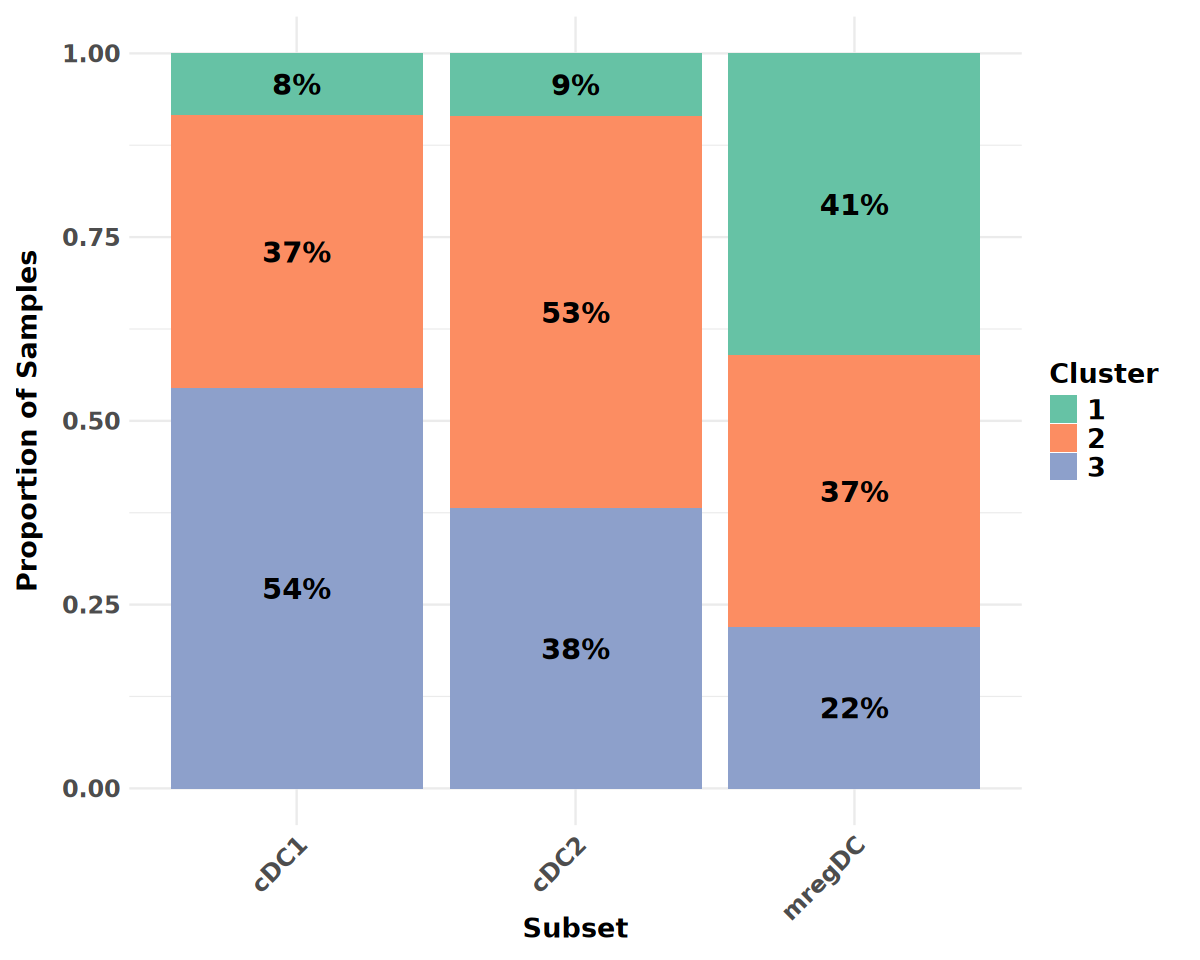

In [ ]:
#plot (this was then replotted manually in GraphPad Prism for manuscript figure)
options(repr.plot.height=8, repr.plot.width=10)

ggplot(df_long, aes(x = Subset, y = Proportion, fill = factor(Cluster))) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = scales::percent(Proportion, accuracy = 1)),
            position = position_stack(vjust = 0.5),
            size = 6, fontface = "bold", color = "black") +
  theme_minimal() +
  labs(x = "Subset", y = "Proportion of Samples", fill = "Cluster") +
  scale_fill_brewer(palette = "Set2") +
  theme(
    axis.text.x = element_text(size = 14, face = "bold", angle = 45, hjust = 1),
    axis.text.y = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 20)),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 16, face = "bold"),
    plot.margin = margin(t = 10, r = 30, b = 10, l = 10)
  )